# German Credit Risk Analysis

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

# Data Loading

In [2]:
df=pd.read_csv('german_credit_data.csv',index_col='Unnamed: 0')

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [6]:
#Size of the dataset
df.shape

(1000, 10)

In [7]:
#Extracting column names
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

# Data Cleaning

In [8]:
# Number of unique values in each column
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [9]:
# Number of unique values of target variable
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [10]:
#Checking for duplicate values
df.duplicated().any()

False

In [11]:
# Sum of missing values in each column
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
# Filling missing values of saving account with NA
df['Saving accounts'] =df['Saving accounts'].fillna(value = 'NA')

In [13]:
# Number of unique values in the column saving account
df['Saving accounts'].value_counts()

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [14]:
# Filling missing values of checking account with NA
df['Checking account'] = df['Checking account'].fillna(value = 'NA')

In [15]:
# Number of unique values in the column checking account
df['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [16]:
#Number of unique values in the job field
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [17]:
#Number of unique values in the pupose field
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [18]:
#df.to_csv('Credit Risk cleaned')

# Data Exploration and Visualization

Customer Demographics Analysis

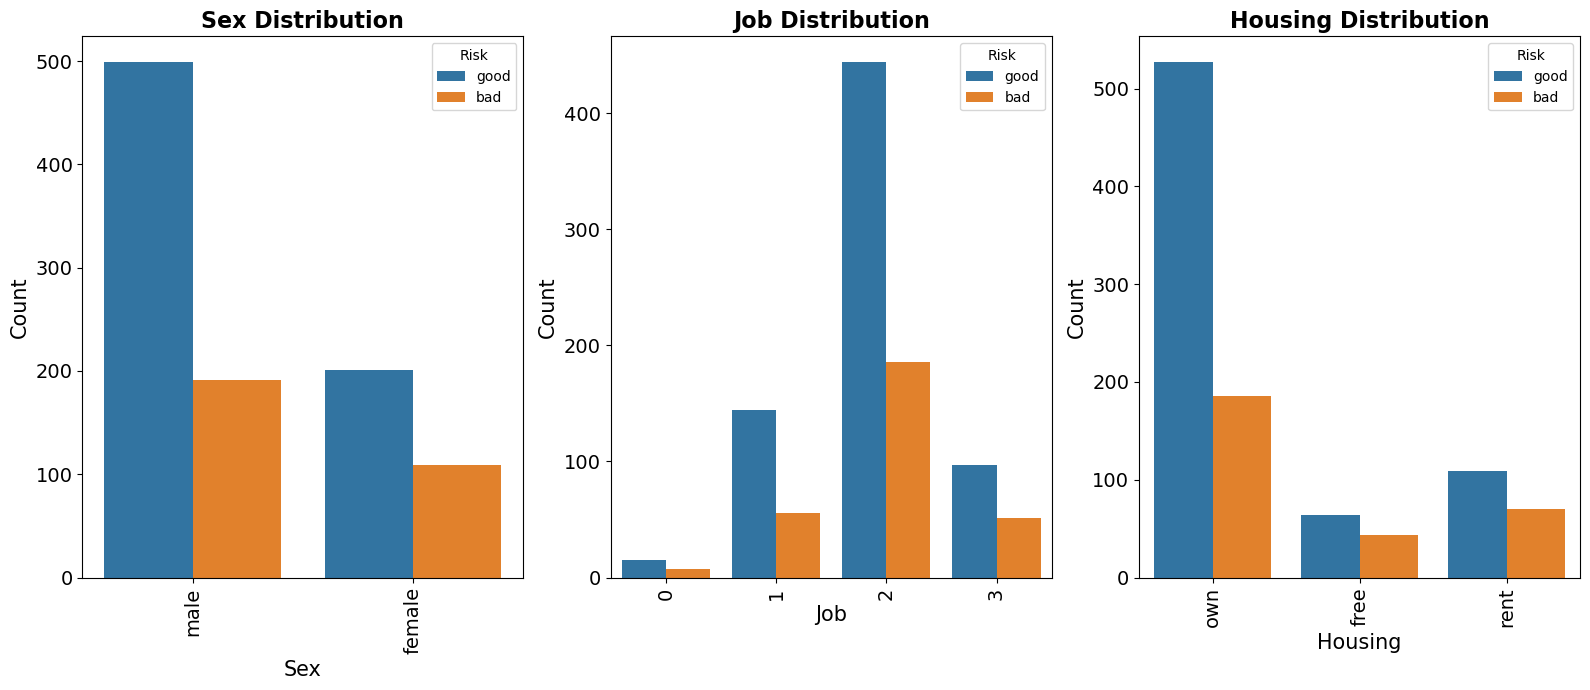

In [19]:
customer_df = ["Sex", "Job", "Housing"]
number_of_columns =3
number_of_rows = math.ceil(len(customer_df) / number_of_columns)

fig = plt.figure(figsize=(16, 7 * number_of_rows))

for index, column in enumerate(customer_df, 1):
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)
    sns.countplot(x=column, data=df, hue='Risk', ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16, fontweight='bold')
    ax.set_xlabel(column, fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.tick_params(axis='x', rotation=90, labelsize=14)  
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

Customer Account Analysis

Text(0.5, 1.0, 'Saving Account & Risk')

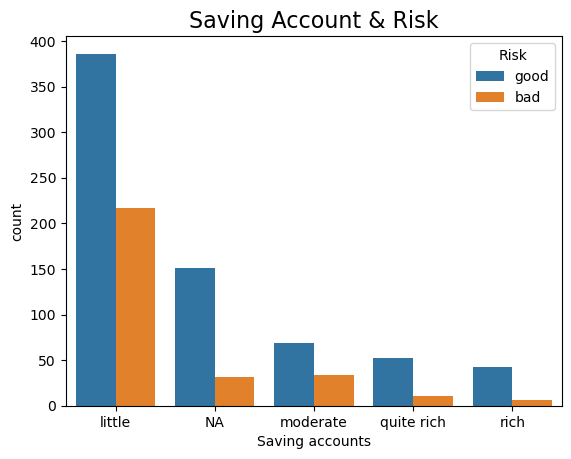

In [20]:
sns.countplot(x='Saving accounts', data=df, hue='Risk', order=df['Saving accounts'].value_counts().index)
plt.title("Saving Account & Risk",size=16)

In [21]:
print("\nLittle Income :\n",df[df['Saving accounts'] == 'little']['Risk'].value_counts().to_frame())
print("\nModerate Income\n", df[df['Saving accounts'] == 'moderate']['Risk'].value_counts().to_frame())


Little Income :
       Risk
good   386
bad    217

Moderate Income
       Risk
good    69
bad     34


Text(0.5, 1.0, 'Checking Account & Risk')

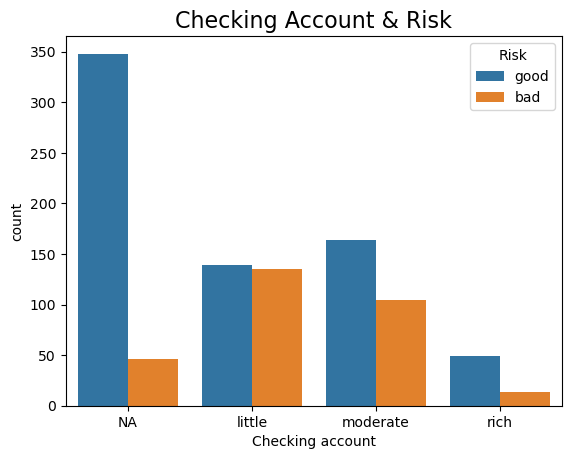

In [22]:
sns.countplot(x= 'Checking account', data =df, hue= 'Risk',order=df['Checking account'].value_counts().index)
plt.title("Checking Account & Risk",size=16)

In [23]:
print("\nLittle Income :\n",df[df['Checking account'] == 'little']['Risk'].value_counts().to_frame())
print("\nModerate Income\n", df[df['Checking account'] == 'moderate']['Risk'].value_counts().to_frame())


Little Income :
       Risk
good   139
bad    135

Moderate Income
       Risk
good   164
bad    105


In [24]:
# Repacing the 'quite rich','rich','NA' values with 'Other' in the saving account field
df['Saving accounts']= df['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other','NA':'other'})

In [25]:
# Checking hte unique values in the saving account field
df['Saving accounts'].value_counts()

little      603
other       294
moderate    103
Name: Saving accounts, dtype: int64

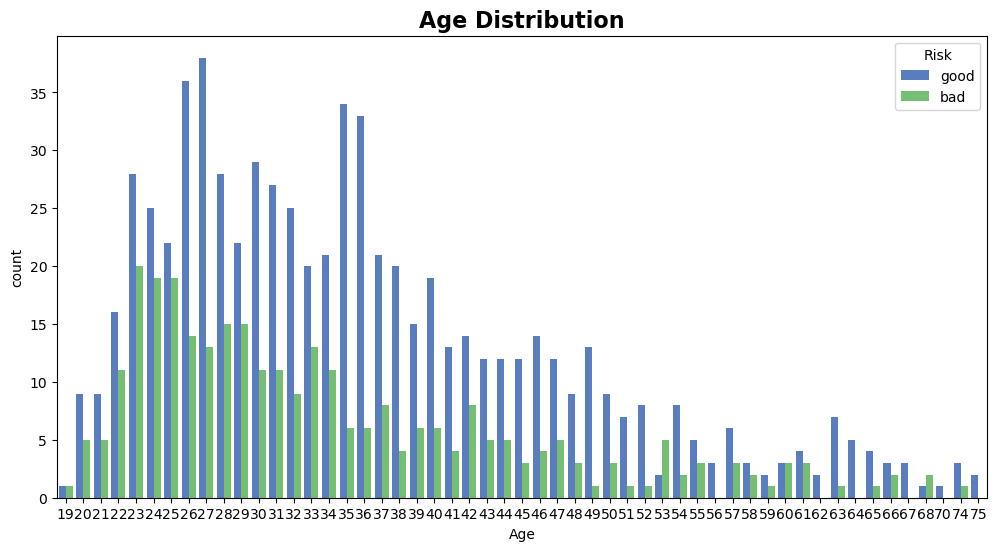

In [26]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8-muted')
sns.countplot(x= 'Age', data =df, hue= 'Risk')
plt.title("Age Distribution",fontweight='bold',size=16)
plt.show()

Credit Amount Analysis

In [19]:
# Categorising the customers based on age into 'student','young','adult','senior'
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)


df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

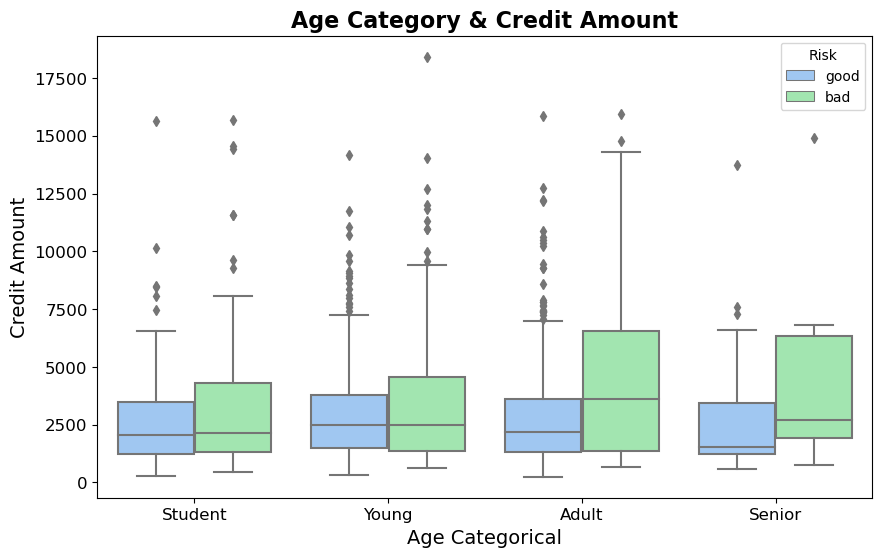

In [28]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-pastel')
sns.boxplot(data=df,x='Age_cat',y='Credit amount',hue='Risk')
plt.title("Age Category & Credit Amount",fontweight='bold',size=16)
plt.xlabel('Age Categorical',size=14)
plt.ylabel('Credit Amount',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

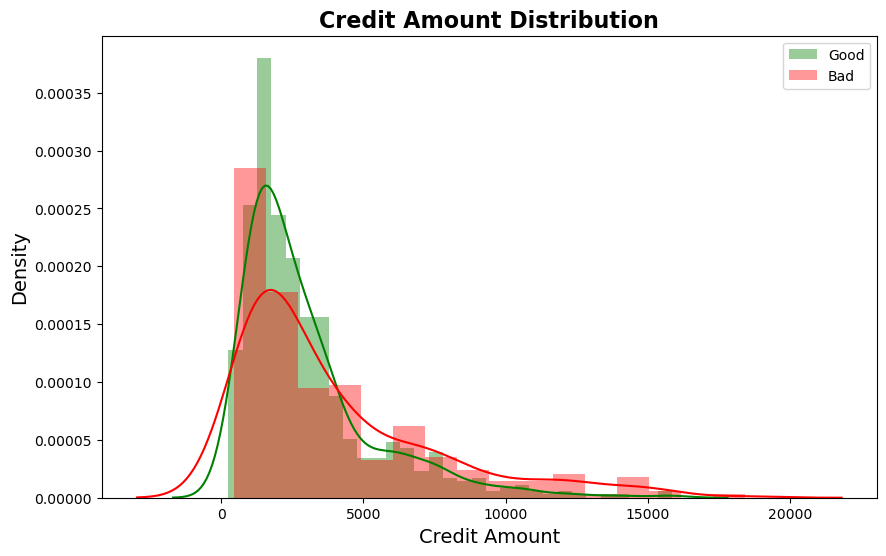

In [29]:
plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))
sns.distplot(df[df['Risk'] == 'good']['Credit amount'], color='g', label='Good')
sns.distplot(df[df['Risk'] == 'bad']['Credit amount'], color='r', label='Bad')

plt.title('Credit Amount Distribution', size=16,fontweight='bold')
plt.xlabel('Credit Amount', size=14)
plt.ylabel('Density', size=14)
plt.legend() 
plt.show()

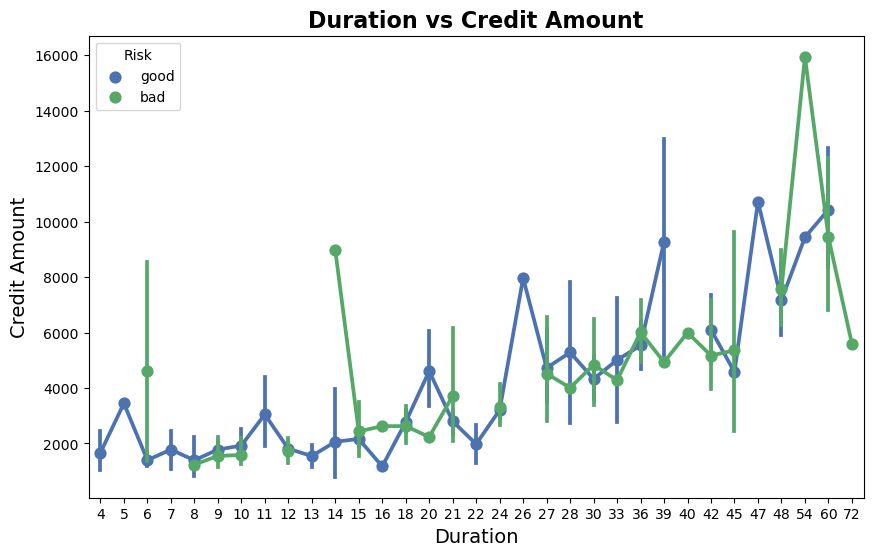

In [30]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-deep')
sns.pointplot(x='Duration',y='Credit amount',hue='Risk',data=df)
plt.title('Duration vs Credit Amount',size=16,fontweight='bold')
plt.xlabel('Duration',size=14)
plt.ylabel('Credit Amount',size=14)
plt.show()

Analysis of Credit Purposes

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

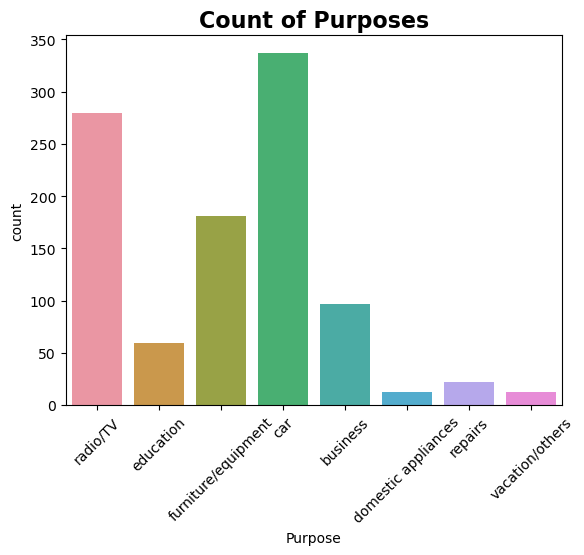

In [31]:
sns.countplot(x= 'Purpose', data =df)
plt.title("Count of Purposes",size=16,fontweight='bold')
plt.xticks(rotation=45,size=10)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

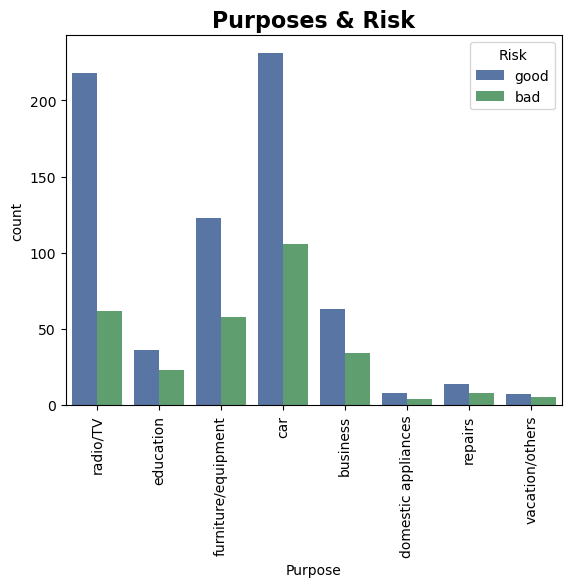

In [32]:
sns.countplot(x= 'Purpose', data =df,hue='Risk')
plt.title("Purposes & Risk",fontweight='bold',size=16)
plt.xticks(rotation=90,size=10)

In [33]:
purpose_gender = ["Purpose", 'Sex']
cm = sns.light_palette("orange", as_cmap=True)
print("Purposes & Gender:")
pd.crosstab(df[purpose_gender[0]], df[purpose_gender[1]]).style.background_gradient(cmap = cm)

Purposes & Gender:


Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [20]:
purpose_age = ["Purpose", 'Age']
cm = sns.light_palette("green", as_cmap=True)
print("Purposes & Age:")
pd.crosstab(df[purpose_age[0]], df[purpose_age[1]]).style.background_gradient(cmap = cm)

Purposes & Age:


Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,74,75
Purpose,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
business,0,0,1,1,2,3,3,9,9,6,2,2,6,3,3,5,2,10,3,2,2,1,3,3,1,1,0,1,0,1,0,2,0,0,0,1,0,0,1,1,1,0,2,0,1,0,0,1,0,0,0,2,0
car,0,3,2,4,14,16,7,14,15,15,12,18,10,10,8,8,17,17,11,12,10,7,7,7,9,7,9,8,6,5,4,2,3,2,2,6,2,1,2,1,1,4,1,1,5,1,1,2,0,3,1,2,2
domestic appliances,0,0,0,1,1,2,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
education,0,0,1,0,4,2,1,1,4,0,1,1,3,4,2,2,3,1,2,1,1,5,2,1,0,0,1,1,2,0,1,3,0,1,1,1,0,1,1,0,0,0,2,0,0,1,0,0,1,0,0,0,0
furniture/equipment,2,7,4,10,10,9,10,9,10,7,6,10,8,6,7,6,6,3,4,1,2,5,3,4,4,3,2,3,2,1,4,3,1,0,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
radio/TV,0,4,6,9,14,12,19,16,10,14,13,8,10,10,11,10,12,7,8,7,5,5,2,7,2,4,3,5,6,3,5,2,3,6,1,1,1,1,4,2,1,0,1,0,1,3,3,2,1,0,0,0,0
repairs,0,0,0,2,3,0,1,0,1,1,0,1,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
vacation/others,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
purpose_age_cat = ["Purpose", 'Age_cat']
cm = sns.light_palette("brown", as_cmap=True)
print("Purposes & Categorical Age:")
pd.crosstab(df[purpose_age_cat[0]], df[purpose_age_cat[1]]).style.background_gradient(cmap = cm)

Purposes & Categorical Age:


Age_cat,Student,Young,Adult,Senior
Purpose,,,,
business,10,47,34,6
car,46,127,145,19
domestic appliances,4,3,4,1
education,8,21,26,4
furniture/equipment,52,75,53,1
radio/TV,64,114,91,11
repairs,6,6,7,3
vacation/others,0,5,7,0


Correlation

In [22]:
# make a copy for the dataset
df1=df.copy()
# Replacing 'good' with 0 and 'bad' with 1
df1['Risk'] = df1['Risk'].replace({'good': 0, 'bad': 1})
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NA,little,1169,6,radio/TV,0,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,Student
2,49,male,1,own,little,NA,2096,12,education,0,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,Adult
4,53,male,2,free,little,little,4870,24,car,1,Adult


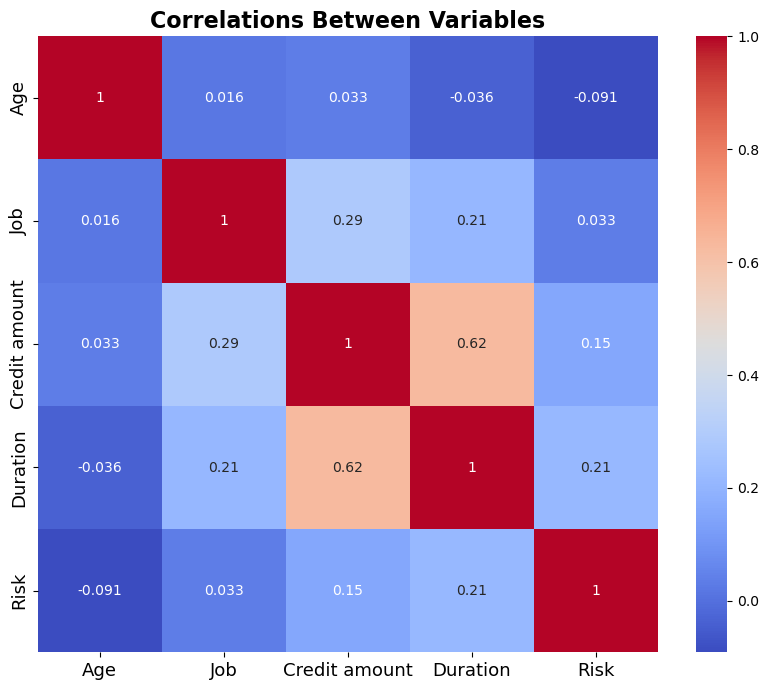

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlations Between Variables',size=16,fontweight='bold')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [23]:
dfc=df1.drop(['Age_cat'],axis=1)
dfc.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NA,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NA,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [39]:
# Convert Data into Excel
#dfc.to_excel('german_credit_datac.xlsx', sheet_name='Sheet1', index=False)

In [40]:
#df1.to_excel('german_credit_c.xlsx', sheet_name='credit_risk', index=False)

# Data Preparation

In [24]:
dfc['Risk'].value_counts()

0    700
1    300
Name: Risk, dtype: int64

# Upsampling Minority

In [25]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [26]:
# Balamcing the data set
dfc_majority = dfc[dfc.Risk == 0]
dfc_minority = dfc[dfc.Risk == 1]

In [27]:
dfc_minority_upsampled = resample(dfc_minority, replace = True, n_samples =  600, random_state = 666)

#Combining
dfc_upscaled = pd.concat([dfc_majority, dfc_minority_upsampled])
dfc_upscaled.Risk.value_counts()

0    700
1    600
Name: Risk, dtype: int64

In [28]:
dfc_upscaled.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

# Feature Engineering

# get_dummies encoding

In [43]:
df1=pd.get_dummies(dfc_upscaled[['Age', 'Sex', 'Housing', 'Saving accounts', 'Checking account','Purpose']],
                   drop_first=True)
dfe=pd.concat([dfc_upscaled,df1],axis=1)
dfe_credit=dfe.drop(['Age', 'Sex', 'Housing', 'Saving accounts', 'Checking account','Purpose'],axis=1)
dfe_credit

,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,1169,6,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,2096,12,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,7882,42,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5,1,9055,36,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2,2835,24,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2,697,12,1,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
951,2,2145,36,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
711,2,1198,6,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
106,3,6458,18,1,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Seperating Input and Output Variables

In [44]:
x = dfe_credit.drop(columns = "Risk")
y = dfe_credit.Risk
# Creating a copy
x1 = x.copy()
y

0      0
2      0
3      0
5      0
6      0
      ..
925    1
951    1
711    1
106    1
559    1
Name: Risk, Length: 1300, dtype: int64

In [54]:
x1

,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,1169,6,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,2096,12,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2,7882,42,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
5,1,9055,36,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,2,2835,24,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2,697,12,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
951,2,2145,36,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
711,2,1198,6,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
106,3,6458,18,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


# Train Test Split

In [45]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=666,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1040, 20), (260, 20), (1040,), (260,))

# Normalization

In [46]:
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[-1.36195651,  0.11321601,  1.0980636 , ...,  1.69297696,
        -0.15694121, -0.13271219],
       [-1.36195651, -1.01835507, -1.30882022, ..., -0.59067549,
        -0.15694121, -0.13271219],
       [ 1.6263025 , -0.37616486,  0.61668683, ...,  1.69297696,
        -0.15694121, -0.13271219],
       ...,
       [-1.36195651,  0.41003756,  1.82012874, ...,  1.69297696,
        -0.15694121, -0.13271219],
       [-1.36195651, -0.7948429 , -0.98790238, ...,  1.69297696,
        -0.15694121, -0.13271219],
       [ 1.6263025 ,  0.42600271,  1.0980636 , ...,  1.69297696,
        -0.15694121, -0.13271219]])

# Model Comparison

In [47]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=666,shuffle=True)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),
                                                  cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.703846, RECALL=(0.710937), PRECISION=(0.664110), ROC-AUC=(0.773158)
KNN:
 ACCURACY = 0.709615, RECALL=(0.729224), PRECISION=(0.669478), ROC-AUC=(0.778094)
SGD:
 ACCURACY = 0.629808, RECALL=(0.630776), PRECISION=(0.620353), ROC-AUC=(0.719416)
DT:
 ACCURACY = 0.799038, RECALL=(0.843018), PRECISION=(0.742024), ROC-AUC=(0.806327)
SVC:
 ACCURACY = 0.743269, RECALL=(0.757562), PRECISION=(0.701066), ROC-AUC=(0.811370)
RF:
 ACCURACY = 0.830769, RECALL=(0.846463), PRECISION=(0.802898), ROC-AUC=(0.908772)
Ada:
 ACCURACY = 0.757692, RECALL=(0.763763), PRECISION=(0.718968), ROC-AUC=(0.806664)
Grad:
 ACCURACY = 0.778846, RECALL=(0.752085), PRECISION=(0.757987), ROC-AUC=(0.843951)


# Model Selection: Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)

In [49]:
report=classification_report(y_test,y_pred)
print("classification report :\n",report)

classification report :
               precision    recall  f1-score   support

           0       0.79      0.71      0.74       140
           1       0.69      0.78      0.73       120

    accuracy                           0.74       260
   macro avg       0.74      0.74      0.74       260
weighted avg       0.74      0.74      0.74       260



In [50]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[99, 41],
       [27, 93]], dtype=int64)

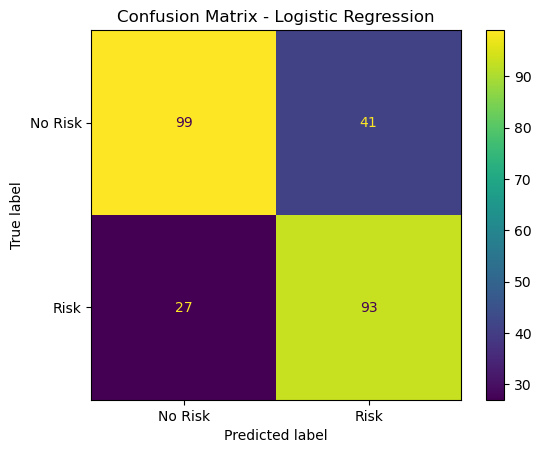

In [51]:
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Risk", "Risk"])
    disp.plot()
    plt.title(f"Confusion Matrix - Logistic Regression")
    plt.show()


In [52]:
cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[99 41]
 [27 93]]
Transactions which were falsely classified as FRAUD =  15.8 Percent
Transactions which were falsely classified as NOT-FRAUD = 10.4 Percent
Transactions which were truly classified as FRAUD = 35.8 Percent
Transactions which were truly classified as NOT-FRAUD = 38.1 Percent


In [53]:
score=accuracy_score(y_test,y_pred)
print("Accuracy Score =",score)

Accuracy Score = 0.7384615384615385
